In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#Missing values Imputation
mean_age=train_df['Age'].mean()
age=int(mean_age)
train_df['Age'].fillna(age,inplace=True)

mean_age_t=test_df['Age'].mean()
age_test=int(mean_age_t)
test_df['Age'].fillna(age_test,inplace=True)

train_df['Cabin'].fillna('NaN',inplace=True)
test_df['Cabin'].fillna('NaN',inplace=True)
train_df['Embarked'].fillna('Unknown',inplace=True)

In [11]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
#Total number of survived and not survived
Survival_rate = {'Survived_count': [0],'Not_Survived_count' : [0],'Total' : [0]}

Survival_rate['Survived_count'] =  train_df.Survived.value_counts()[0]
Survival_rate['Not_Survived_count'] =  train_df.Survived.value_counts()[1]
Survival_rate['Total'] =  Survival_rate['Survived_count'] + Survival_rate['Not_Survived_count']

# Create the index 
index_ = ['Survival_Rate'] 
  
# Set the index 

Survival=pd.DataFrame([Survival_rate])
Survival.index = index_ 
Survival.transpose()

,Survival_Rate
Survived_count,549
Not_Survived_count,342
Total,891


In [13]:
#Survived and Not Survived by Age and Embarked
s_count = {'Not_Survived':[0],'Survived':[0]}
sf_count = {'Not_Survived':[0],'Survived':[0]}
c_count = {'Not_Survived':[0],'Survived':[0]}
cf_count = {'Not_Survived':[0],'Survived':[0]}
q_count = {'Not_Survived':[0],'Survived':[0]}
qf_count = {'Not_Survived':[0],'Survived':[0]}
s_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='S'),'Survived'].value_counts()[0]
s_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='S'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked S'] 
# Set the index 
male_S=pd.DataFrame([s_count])
male_S.index = index_ 
#male_S.transpose()
#male_S
sf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='S'),'Survived'].value_counts()[0]
sf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='S'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Female passengers : Embarked S'] 
# Set the index 
female_S=pd.DataFrame([sf_count])
female_S.index = index_
c_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='C'),'Survived'].value_counts()[0]
c_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='C'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked C'] 
# Set the index 
male_C=pd.DataFrame([c_count])
male_C.index = index_ 
#male_C
cf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='C'),'Survived'].value_counts()[0]
cf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='C'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Female passengers : Embarked C'] 
# Set the index 
female_C=pd.DataFrame([cf_count])
female_C.index = index_ 
q_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[0]
q_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked Q'] 
# Set the index 
male_Q=pd.DataFrame([q_count])
male_Q.index = index_ 
#male_Q
qf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[0]
qf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['female passengers : Embarked Q'] 
# Set the index 
female_Q=pd.DataFrame([qf_count])
female_Q.index = index_ 
#male_Q
frames=[male_S,female_S,male_C,female_C,male_Q,female_Q]
result=pd.concat(frames)
Gender_Embarked = pd.DataFrame(result)
Gender_Embarked

,Not_Survived,Survived
Male passengers : Embarked S,364,77
Female passengers : Embarked S,63,140
Male passengers : Embarked C,66,29
Female passengers : Embarked C,9,64
Male passengers : Embarked Q,38,3
female passengers : Embarked Q,9,27


In [14]:
#Survived and Non Survived male and female by PClass
a = {'Not_Survived':[0],'Survived':[0]}
b = {'Not_Survived':[0],'Survived':[0]}
c = {'Not_Survived':[0],'Survived':[0]}
d = {'Not_Survived':[0],'Survived':[0]}
e = {'Not_Survived':[0],'Survived':[0]}
f = {'Not_Survived':[0],'Survived':[0]}
a=train_df.loc[(train_df['Sex']=='female') & (train_df['Pclass']== 1),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 1'] 
# Set the index 
female_1=pd.DataFrame([a])
female_1.index = index_ 
b=train_df.loc[(train_df['Sex']=='female') & (train_df['Pclass']== 2),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 2'] 
# Set the index 
female_2=pd.DataFrame([b])
female_2.index = index_ 
c=train_df.loc[(train_df['Sex']=='female') & (train_df['Pclass']== 3),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 3'] 
# Set the index 
female_3=pd.DataFrame([c])
female_3.index = index_ 
d=train_df.loc[(train_df['Sex']=='male') & (train_df['Pclass']== 1),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 1'] 
# Set the index 
male_1=pd.DataFrame([d])
male_1.index = index_ 
e=train_df.loc[(train_df['Sex']=='male') & (train_df['Pclass']== 2),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 2'] 
# Set the index 
male_2=pd.DataFrame([e])
male_2.index = index_ 
f=train_df.loc[(train_df['Sex']=='male') & (train_df['Pclass']== 3),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 3'] 
# Set the index 
male_3=pd.DataFrame([f])
male_3.index = index_ 
#male_Q
frames=[male_1,female_1,male_2,female_2,male_1,female_2,male_3,female_3]
result=pd.concat(frames)
Gender_PClass = pd.DataFrame(result)
Gender_PClass

,0,1
Male passengers : PClass 1,77,45
Female passengers : PClass 1,3,91
Male passengers : PClass 2,91,17
Female passengers : PClass 2,6,70
Male passengers : PClass 1,77,45
Female passengers : PClass 2,6,70
Male passengers : PClass 3,300,47
Female passengers : PClass 3,72,72


In [15]:
#Computation of Age Bins**
train_df['age_bins'] = pd.cut(x=train_df['Age'], bins=8, labels=False, retbins=False, include_lowest=True)
test_df['age_bins'] = pd.cut(x=test_df['Age'], bins=8, labels=False, retbins=False, include_lowest=True)

In [16]:
#Computation of Fare Range**
train_df['Fare_cat']=0
train_df.loc[train_df['Fare']<=7.91,'Fare_cat']=0
train_df.loc[(train_df['Fare']>7.91)&(train_df['Fare']<=14.454),'Fare_cat']=1
train_df.loc[(train_df['Fare']>14.454)&(train_df['Fare']<=31),'Fare_cat']=2
train_df.loc[(train_df['Fare']>31)&(train_df['Fare']<=93.5),'Fare_cat']=3
train_df.loc[(train_df['Fare']>93.5)&(train_df['Fare']<=164.8667),'Fare_cat']=4
train_df.loc[(train_df['Fare']>164.8667)&(train_df['Fare']<=512.3292),'Fare_cat']=5

test_df['Fare_cat']=0
test_df.loc[test_df['Fare']<=7.91,'Fare_cat']=0
test_df.loc[(test_df['Fare']>7.91)&(test_df['Fare']<=14.454),'Fare_cat']=1
test_df.loc[(test_df['Fare']>14.454)&(test_df['Fare']<=31),'Fare_cat']=2
test_df.loc[(test_df['Fare']>31)&(test_df['Fare']<=93.5),'Fare_cat']=3
test_df.loc[(test_df['Fare']>93.5)&(test_df['Fare']<=164.8667),'Fare_cat']=4
test_df.loc[(test_df['Fare']>164.8667)&(test_df['Fare']<=512.3292),'Fare_cat']=5

In [17]:
#Extract Initials from the Name feature. Categorize the Initials by different values
name = train_df['Name']
#Extract the initials
train_df['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
test_df['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
train_df['Title'].astype(str)
test_df['Title'].astype(str)
#Assign Rare for the rare initials
train_df.Title[train_df.Title == 'Rev'] = 'Rare'
train_df.Title[train_df.Title == 'Major'] = 'Rare'
train_df.Title[train_df.Title == 'Lady'] = 'Rare'
train_df.Title[train_df.Title == 'Dr'] = 'Rare'
train_df.Title[train_df.Title == 'Mme'] = 'Rare'
train_df.Title[train_df.Title == 'Mlle'] = 'Rare'
train_df.Title[train_df.Title == 'Col'] = 'Rare'
train_df.Title[train_df.Title == 'Capt'] = 'Rare'

test_df.Title[test_df.Title == 'Rev'] = 'Rare'
test_df.Title[test_df.Title == 'Major'] = 'Rare'
test_df.Title[test_df.Title == 'Lady'] = 'Rare'
test_df.Title[test_df.Title == 'Dr'] = 'Rare'
test_df.Title[test_df.Title == 'Mme'] = 'Rare'
test_df.Title[test_df.Title == 'Mlle'] = 'Rare'
test_df.Title[test_df.Title == 'Col'] = 'Rare'
test_df.Title[test_df.Title == 'Capt'] = 'Rare'
# Categorize the Initial
train_df['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
test_df['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
#train_df

# Missing values Imputation
train_df['Title'].fillna(0,inplace=True)
test_df['Title'].fillna(0,inplace=True)

In [18]:
#Categorize sex to numeric variable
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [19]:
#train_df['Embarked'].unique()
train_df['Embarked'] = train_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3,'Unknown':0} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3,'Unknown':0} ).astype(int)
#dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [20]:
#Family Size Computation
train_df['Family_Size']=0
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone']=0
train_df.loc[(train_df['Family_Size']==1),'IsAlone']=1
train_df.loc[(train_df['Family_Size']==0) | (train_df['Family_Size']>1),'IsAlone']=0

test_df['Family_Size']=0
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']
test_df['IsAlone']=0
test_df.loc[(test_df['Family_Size']==1),'IsAlone']=1
test_df.loc[(test_df['Family_Size']==0) | (test_df['Family_Size']>1),'IsAlone']=0

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
 12  age_bins     891 non-null    int64  
 13  Fare_cat     891 non-null    int64  
 14  Title        891 non-null    float64
 15  Family_Size  891 non-null    int64  
 16  IsAlone      891 non-null    int64  
dtypes: float64(3), int32(1), int64(10), object(3)
memory usage: 115.0+ KB


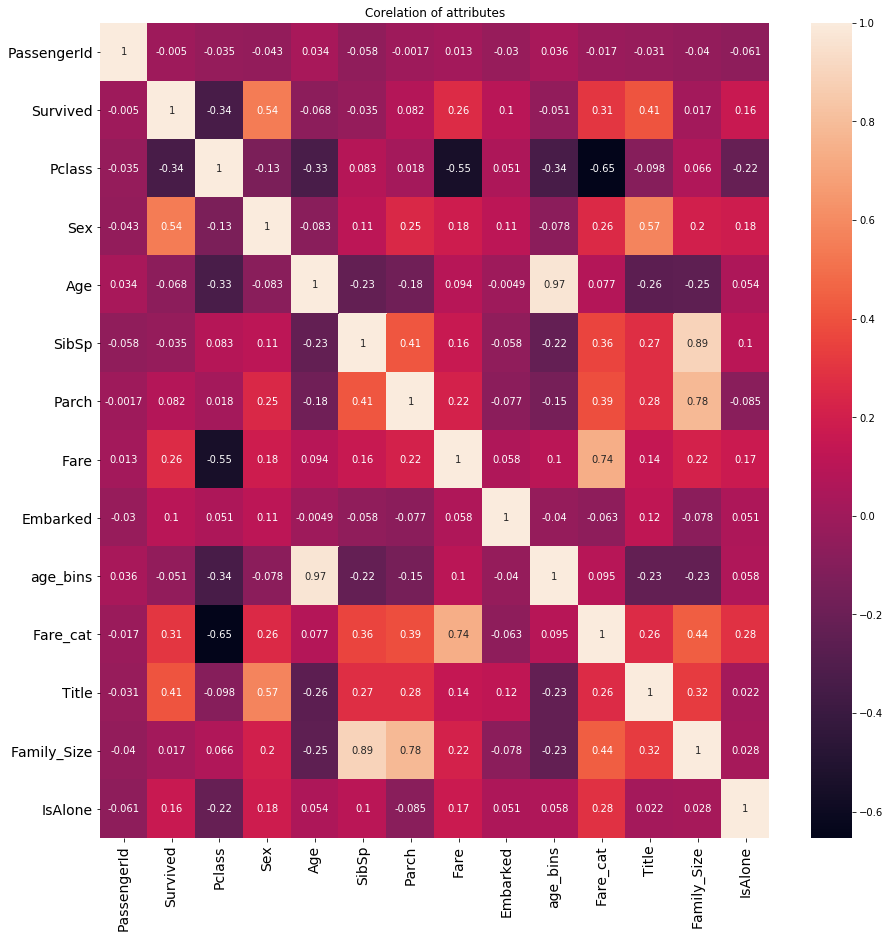

In [22]:
sns.heatmap(train_df.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

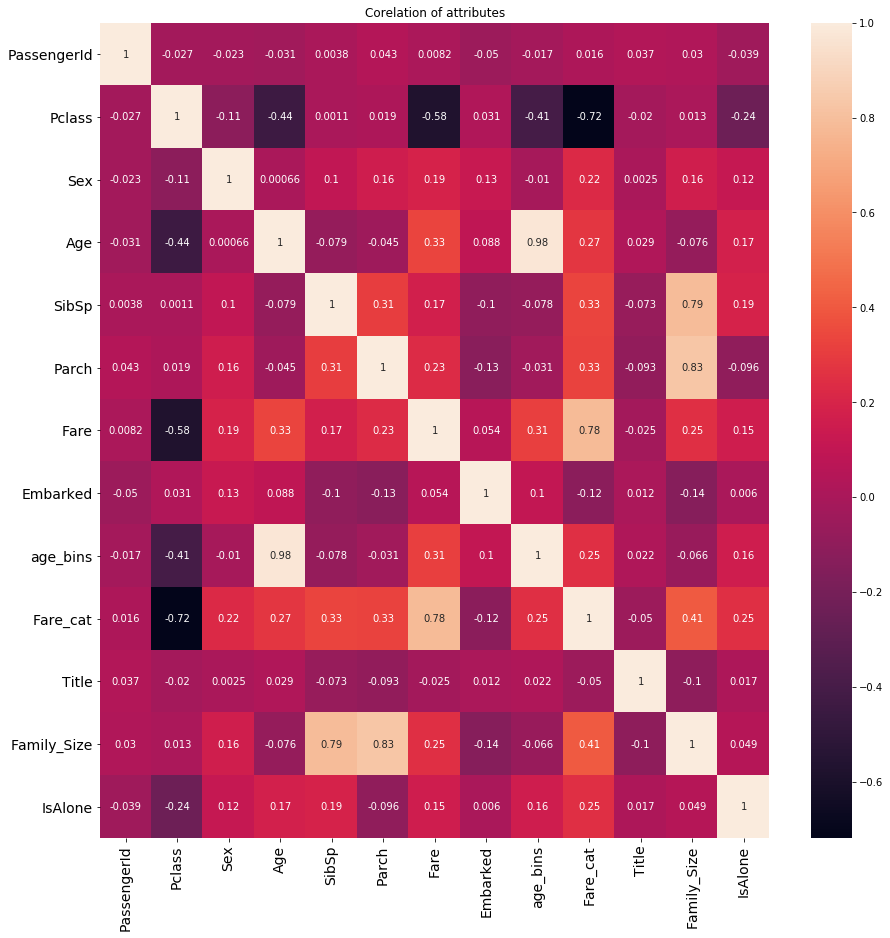

In [23]:
sns.heatmap(test_df.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [24]:
#Feature Importance by ExtraTreeClassifier
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
y = train_df['Survived'] 
#X = pd.DataFrame(train_df)
#df.drop(['A'], axis = 1)
x = train_df.drop(['Survived','Name','Ticket','Cabin'],axis=1) 


In [25]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,2,0,1.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,3,3,2.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,1,3.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,3,3,2.0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,3,1,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1,2,1,5.0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1,1,2,3.0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.4500,NaN,1,2,2,3.0,3,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2,2,2,1.0,0,0


In [26]:
#Prediction - Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
#Drop unnecessary columns in train and test set before predictions

train_df = train_df.drop("Name", axis=1)
train_df = train_df.drop("Ticket", axis=1)
train_df = train_df.drop("Cabin", axis=1)
train_df = train_df.drop("Fare", axis=1)
train_df = train_df.drop("Embarked", axis=1)
train_df = train_df.drop("IsAlone", axis=1)
train_df = train_df.drop("SibSp", axis=1)
train_df = train_df.drop("Parch", axis=1)
train_df = train_df.drop("age_bins", axis=1)
train_df = train_df.drop("PassengerId", axis=1)


test_df = test_df.drop("Name", axis=1)
test_df = test_df.drop("Ticket", axis=1)
test_df = test_df.drop("Cabin", axis=1)
test_df = test_df.drop("Fare", axis=1)
test_df = test_df.drop("Embarked", axis=1)
test_df = test_df.drop("IsAlone", axis=1)
test_df = test_df.drop("SibSp", axis=1)
test_df = test_df.drop("Parch", axis=1)
#test_df = test_df.drop("Pclass", axis=1)
#test_df = test_df.drop("Age", axis=1)
test_df = test_df.drop("age_bins", axis=1)

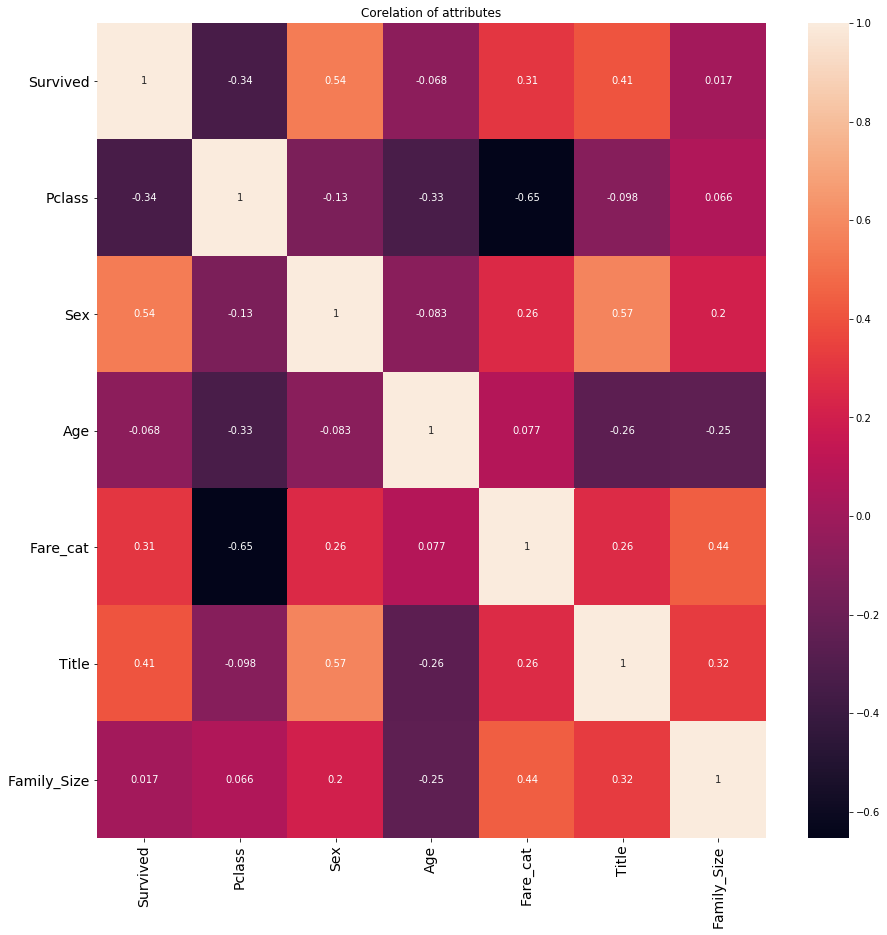

In [28]:
#Corelation map (Heatmap) after Feature Selection and dropping columns for prediction

sns.heatmap(train_df.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [29]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9,stratify=y)
x_train.shape, y_train.shape, x_test.shape

((623, 13), (623,), (268, 13))

In [30]:
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
454,455,3,0,29.0,0,0,8.0500,1,2,1,1.0,0,0
594,595,2,0,37.0,1,0,26.0000,1,3,2,1.0,1,1
310,311,1,1,24.0,0,0,83.1583,2,2,3,3.0,0,0
549,550,2,0,8.0,1,1,36.7500,1,0,3,4.0,2,0
406,407,3,0,51.0,0,0,7.7500,1,5,0,1.0,0,0


In [31]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)

In [32]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

############################### KNeighborsClassifier ##################################

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.6343283582089553


Cross_val_score= 0.5409737827715355


roc_auc_score=  0.5662253604001176


classification_report
               precision    recall  f1-score   support

           0       0.65      0.86      0.74       165
           1       0.55      0.27      0.36       103

    accuracy                           0.63       268
   macro avg       0.60      0.57      0.55       268
weighted avg       0.61      0.63      0.60       268
 

Confusion Matrix
 [[142  23]
 [ 75  28]] 




############################### SVC ##################################

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kern

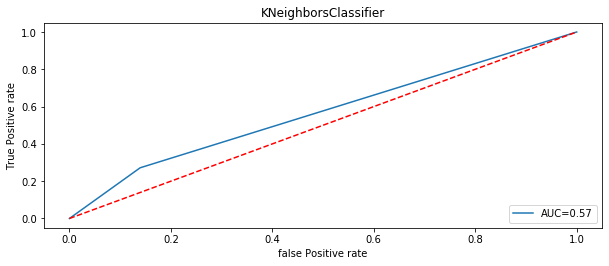

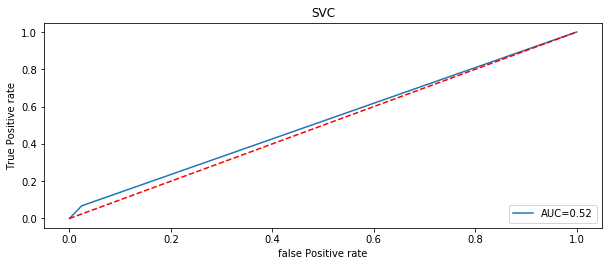

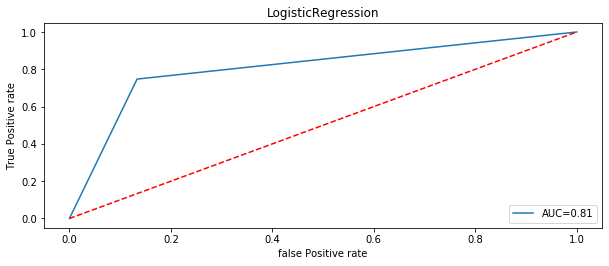

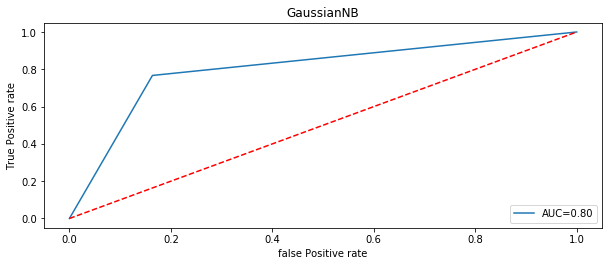

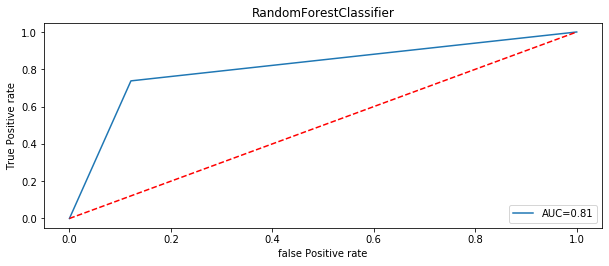

In [34]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('###############################',name,'##################################\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre),'\n')
    cm=confusion_matrix(y_test,pre)
    print('Confusion Matrix\n',cm,'\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('false Positive rate')
    print('\n\n')

In [35]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,63.432836,54.097378,56.622536
1,SVC,62.686567,65.438202,52.185937
2,LogisticRegression,82.089552,79.796504,80.711974
3,GaussianNB,80.970149,79.018727,80.167696
4,RandomForestClassifier,82.462687,82.609238,80.832598


In [36]:
from sklearn.externals import joblib
joblib.dump(RFC,'Model_Titanic_train.csv')

['Model_Titanic_train.csv']

In [37]:
model=joblib.load('Model_Titanic_train.csv')

In [38]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0], dtype=int64)